# 3.5编程实现线性判别分析

### without sklearn

### Analysis：
####  X with array(n,3): attributes with array(n,2), and add ones(n,1)
#### $\beta$ with array(1,3): $ \omega$ with array (1,2), and add  b , so $\beta^T$ is an array with(3,1)
####  y with array(n,1)


![title](3.3alpha.png)

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

D:\python\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


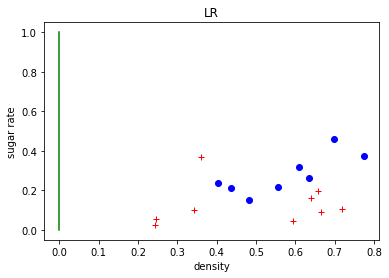

In [31]:
if __name__=="__main__":
 
    #read data from csv file
    workbook = pd.read_csv("../ml_exercise-master/data/3.0a.csv")
    workbook.head(5)
    workbook.insert(3, "3", 1) # add b
    X = workbook.values[:, 1:-1]
    y = workbook.values[:, 4].reshape(-1, 1)

    
    #plot training data
    positive_data = workbook.values[workbook.values[:, 4] == 1.0, :]
    negative_data = workbook.values[workbook.values[:, 4] == 0, :]
    
    X0 = positive_data[:,1:3
                      ]
    X1 = negative_data[:,1:3]
    miu0 = np.mean(X0, axis = 0, keepdims = True) #axis是几，那就表明哪一维度被压缩成1。`1 X 2
    miu1 = np.mean(X1, axis = 0, keepdims = True) #1 X 2
    
    
    Sw = (X0-miu0).T.dot(X0-miu0) + (X1-miu1).T.dot(X1-miu1)  # 类内散度矩阵  2 X 2 与西瓜书相反，矩阵相乘是dot    
    omega = np.linalg.inv(Sw).dot((miu0-miu1).T)
    right = (-omega[0])/omega[1]
    plt.plot(X0[:,0],X0[:,1],'bo')      # 第一类数据点
    plt.plot(X1[:,0],X1[:,1],'r+')      # 第二类数据点
    plt.plot([0,0],[1,right],'g-')
    
    plt.xlabel('density')
    plt.ylabel('sugar rate')
    plt.title("LR")
    plt.show()

In [34]:
print(omega)

[[6.62487509e-04]
 [9.36728168e-01]]
